In [160]:
%%capture
!pip install tabulate

In [161]:
import requests
import csv
import numpy as np
import pandas as pd
from tabulate import tabulate
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

In [162]:
extract_contents= lambda row : [x.text.replace('\n','') for x in row]

In [164]:
url='https://www.mohfw.gov.in/'
r=requests.get(url)
soup=BeautifulSoup(r.content,'html5lib')

In [165]:
#print(soup.prettify())

new_headers= ['S.No', 'State','Indian-Confirmed', 'Foreign-Confirmed','Cured','Death'] 

In [166]:
headers1=extract_contents( soup.find_all('th') )
#for i,row in enumerate(headers1):
#    print(row)

In [167]:
stats=[]
all_rows=soup.find_all('tr')

for row in all_rows:
        stat=extract_contents(row.find_all('td'))
        
        if len(stat)==5:            
            stats.append(['',*stat])
        elif len(stat)==6:
            stats.append(stat)
stats[-1][1]='Total Cases'
stats[-1][2]=stats[-1][2][:-1]
summary=stats[-1]
stats.remove(stats[-1]) 



#summary

In [168]:
statelist=[row[1] for row in stats]

y_pos=np.arange(len(statelist))

performance=[ int(row[2]) + int(row[3]) for row in stats ]

table=tabulate(stats,headers=new_headers)

#print(table)

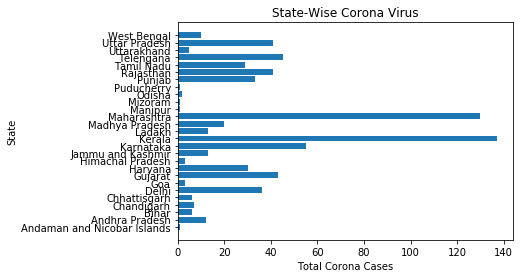

In [169]:

plt.barh(y_pos,performance)

plt.yticks(y_pos,statelist)

plt.title('State-Wise Corona Virus')
plt.ylabel('State')
plt.xlabel('Total Corona Cases')
plt.show()


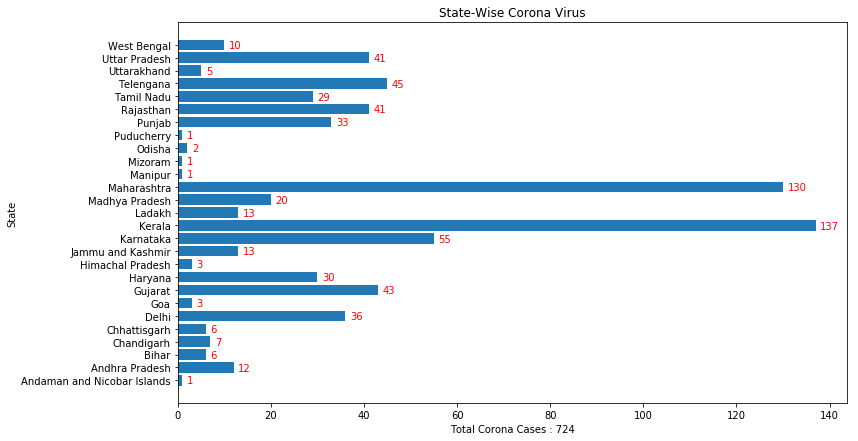

In [170]:
plt.subplots(figsize=(12,7))
plt.barh(y_pos,performance,align='center',alpha=0.99)

for i,j in enumerate(performance):
    plt.annotate(j,xy=(j+1,i-0.25),color='red')


plt.yticks(y_pos,statelist)
plt.title('State-Wise Corona Virus')
plt.ylabel('State')
plt.xlabel('Total Corona Cases : '+str(sum(performance)))
plt.show()

In [176]:
print(print(print('dsf')))

dsf
None
None


In [174]:
#!pip install latex

In [196]:
url1='https://docs.google.com/spreadsheets/d/e/2PACX-1vSc_2y5N0I67wDU38DjDh35IZSIS30rQf7_NYZhtYYGU1jJYT6_kDx4YpF-qw0LSlGsBYP8pqM_a1Pd/pubhtml#'
r1=requests.get(url1)
soup1=BeautifulSoup(r1.content,'html5lib')    

In [197]:
print(soup1.prettify())

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [283]:
df=pd.DataFrame(stats)

df.drop(columns={0},inplace=True,axis=0)

df.columns= ['State','Indian-Confirmed', 'Foreign-Confirmed','Cured','Death'] 

df.set_index('State',inplace=True)

df = df.astype(int)

df.reset_index(inplace=True)
df.loc[23,'State']='Telangana'
df.head()


,State,Indian-Confirmed,Foreign-Confirmed,Cured,Death
0,Andaman and Nicobar Islands,1,0,0,0
1,Andhra Pradesh,12,0,1,0
2,Bihar,6,0,0,1
3,Chandigarh,7,0,0,0
4,Chhattisgarh,6,0,0,0


In [284]:
df['Total_cases']=df['Indian-Confirmed'] + df['Foreign-Confirmed']
df['Present_cases_count']=df['Indian-Confirmed'] + df['Foreign-Confirmed']-df['Cured']-df['Death']
df.head()

,State,Indian-Confirmed,Foreign-Confirmed,Cured,Death,Total_cases,Present_cases_count
0,Andaman and Nicobar Islands,1,0,0,0,1,1
1,Andhra Pradesh,12,0,1,0,12,11
2,Bihar,6,0,0,1,6,5
3,Chandigarh,7,0,0,0,7,7
4,Chhattisgarh,6,0,0,0,6,6


In [285]:
df.dtypes

State                  object
Indian-Confirmed        int32
Foreign-Confirmed       int32
Cured                   int32
Death                   int32
Total_cases             int32
Present_cases_count     int32
dtype: object

In [290]:
india_geo = r'india_state.json'

india_map = folium.Map(location=[20.5937, 78.9629], zoom_start=4, tiles='Mapbox Bright')


In [291]:

india_map.choropleth(
    geo_data=india_geo,
    data=df,
    columns=['State','Present_cases_count'],
    #key_on='feature.properties.NAME_1',
    key_on='feature.properties.ST_NM',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Covid Statewise Count- India'
)

# display map
india_map